<h3>IMPORT DATA AND PACKAGES<h3>


In this section i will import the library packages that I need to use for the project.
1. Numpy ~ for scientific computing in python. It provides a high-performance multidimensional array object and tools for working with these arrays.
2. Pandas ~ for data structures and data analysis in python. It provides a high-performance multidimensional array object.
3. Matplotlib ~ for creating static, animated, and interactive visualizations.

The dataset that was provided was already slip into training and testing data. In order to run the datasets for the program I will read both files separately using pandas.

**VARIABLE DESCRIPTIONS**

Pclass:     Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival:   Survival (0 = No; 1 = Yes) **(DEPENDENT VARIABLE)**

name:       Name

sex:        Sex

age:        Age

sibsp:      Number of Siblings/Spouses Aboard

parch:      Number of Parents/Children Aboard

ticket:     Ticket Number

fare:       Passenger Fare (British pound)

cabin:      Cabin

embarked:   Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES**

Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
If the Age is estimated, it is in the form xx.5

Fare is in Pre-1970 British Pounds ()
Conversion Factors: 1 = 12s = 240d and 1s = 20d

With respect to the family relation variables (i.e. sibsp and parch) some relations were
ignored. The following are the definitions used for sibsp and parch:

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances
Ignored)

Parent: Mother or Father of Passenger Aboard Titanic

Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic


Other family relatives excluded from this study include cousins, nephews/nieces,
aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0
for them. As well, some travelled with very close friends or neighbors in a village,
however, the definitions do not support such relations

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Train_df = pd.read_csv('train.csv')
Test_df = pd.read_csv('test.csv')

**OVERVIEW OF TRAINING DATA**

In [112]:
Train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
Train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The training dataset had 12 variable columns in total with 891 rows (or entries) representing individual passengers. 

The data shows passenger name, survival, Pclass, sex, if they were traveling with parents or siblings, ticket number, price they paid for fare, cabin, and where they embarked from. 

The dataset is mixed (with strings, floats and integers).

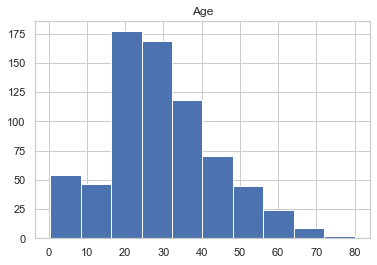

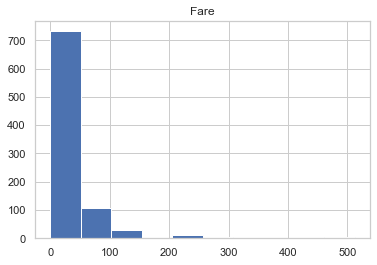

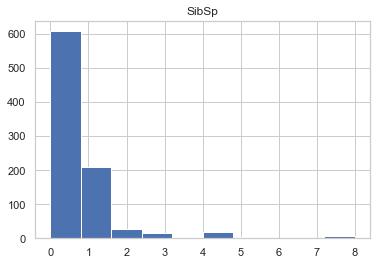

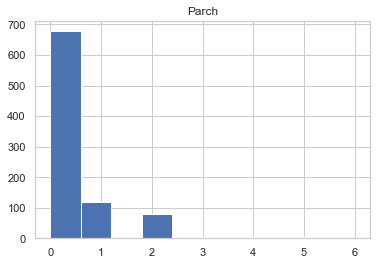

In [115]:
df_num = Train_df[['Age', 'Fare', 'SibSp', 'Parch']]
df_cat = Train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age      Fare     SibSp     Parch
Age    1.000000  0.096067 -0.308247 -0.189119
Fare   0.096067  1.000000  0.159651  0.216225
SibSp -0.308247  0.159651  1.000000  0.414838
Parch -0.189119  0.216225  0.414838  1.000000


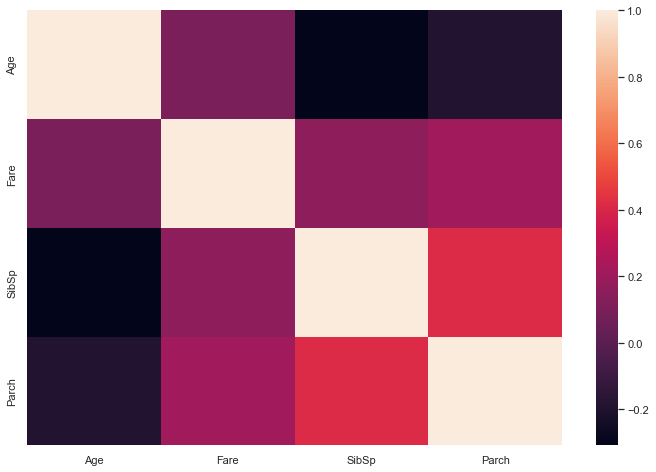

In [116]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df_num.corr(), ax=ax)
print(df_num.corr())
plt.show()


In [117]:
#compare survival rates across Age, SibSp, Fare, Parch
pd.pivot_table(Train_df, index = 'Survived', values = ['Age', 'SibSp', 'Fare', 'Parch']) 

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


**DATA QUALITY CHECK (TRAINING DATA)**

As we want to do some machine learning and visualizations in this project, I checked for the quality of data because machine learning algorithms do not support data with missing values.

In [118]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note: The training dataset has 177 missing age values, 687 cabin values and 2 embarked values.

**OVERVIEW OF TESTING DATA**

As I will use 2 different datasets for my project, I though it would also be important to get an overview of the testing dataset.

In [119]:
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The testing dataset has 11 variable columns in total and 418 rows (or unique entries).

The data provided excludes the survival column. This is because the test dataset is going to be used to predict whether or not a passenger survived. 

The dataset also has strings, floats and integers.

**DATA QUALITY CHECK (TESTING DATA)**

I will also check the quality of the testing dataset as the original data was already slip into 2 sets of data. 

This processes is important because its a different dataset and a generalized assumption can lead to bias in our model.

In [121]:
Test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Note: the testing dataset has 86 missing age values, 1 missing fare value 327 missing cabin values.

**VISUALIZING MISSING VALUES** 

In this stage, I am going to visualize the missing values against the total number of values in our dataset in order for us to get a clear picture of the percentage of whats missing and make positive decisions on what we will do with the data.
From the datasets provided, the missing values are in the following columns:
1. Age
2. Fare
3. Cabin 
4. Embarked

Text(0, 0.5, 'values')

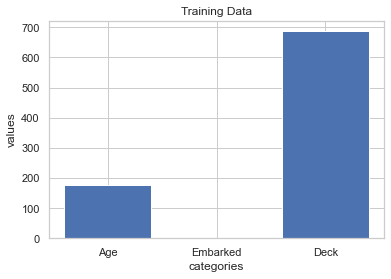

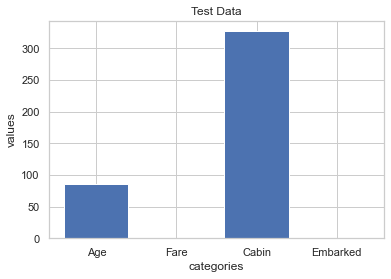

In [122]:
#visualizing missing values from Training Data
missing_age = Train_df.isnull().sum()['Age']
missing_embarked = Train_df.isnull().sum()['Embarked']
missing_deck = Train_df.isnull().sum()['Cabin']
#missing_embark_town = Train_df.isnull().sum()['embark_town']

Y1 = [missing_age, missing_embarked, missing_deck]
X1 = ['Age', 'Embarked', 'Deck']
fig, ax = plt.subplots()
ax.bar(X1, Y1)

# Add title and axis names
plt.title('Training Data')
plt.xlabel('categories')
plt.ylabel('values')
 
# Create names on the x axis
#plt.xticks(x_pos, bars)
 
#visualizing missing values from Testing dataset

missingAge = Test_df.isnull().sum()['Age'] 
missingFare = Test_df.isnull().sum()['Fare']
missingCabin = Test_df.isnull().sum()['Cabin']
missingEmbarked = Test_df.isnull().sum()['Embarked']

Y = [missingAge, missingFare, missingCabin, missingEmbarked]
X = ['Age', 'Fare', 'Cabin','Embarked']
fig, ax = plt.subplots()
ax.bar(X,Y)

# Add title and axis names
plt.title('Test Data')
plt.xlabel('categories')
plt.ylabel('values')

**Calculating percentage of missing data**

From the simple visualization, you can see that age, deck and cabin are the variables with the most missing data. I would also like to believe that deck and cabin probably mean the same but just that different terminology was used. 

Now I want to give a graphical visualization of the percentage of missing data.

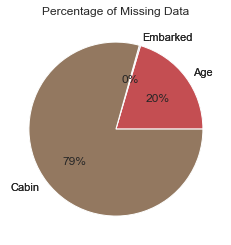

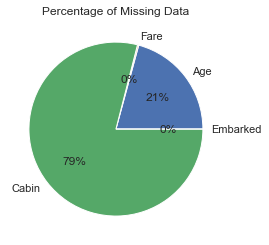

In [123]:
Y1 = [missing_age, missing_embarked, missing_deck]
labels = ['Age', 'Embarked', 'Cabin']

fig, ax = plt.subplots()
ax.pie(Y1, labels = labels, autopct = '%.0f%%')
plt.pie(Y1, labels=labels)
ax.set_title('Percentage of Missing Data')
plt.show() 

Y = [missingAge, missingFare, missingCabin, missingEmbarked]
labels = ['Age', 'Fare', 'Cabin','Embarked']

fig, ax = plt.subplots()
ax.pie(Y, labels = labels, autopct = '%.0f%%')
ax.set_title ('Percentage of Missing Data')
plt.show() 

In [124]:
# percent of missing "Age" 
print('Training Data: Percent of missing "Age" records is %.2f%%' %((Train_df['Age'].isnull().sum()/Train_df.shape[0])*100))

print('Testing Data: Percent of missing "Age" records is %.2f%%' %((Test_df['Age'].isnull().sum()/Test_df.shape[0])*100))

#percentage of missing "Embarked"
print('Training Data: Percent of missing "Embarked" records is %.2f%%' %((Train_df['Embarked'].isnull().sum()/Train_df.shape[0])*100))


Training Data: Percent of missing "Age" records is 19.87%
Testing Data: Percent of missing "Age" records is 20.57%
Training Data: Percent of missing "Embarked" records is 0.22%


**Calculating Mean, Median and Mode**

In [125]:
#Import the statistics module
import statistics

print("The mean of 'Age' of Training Data is:")
statistics.mean(Train_df['Age'].dropna().to_list())


The mean of 'Age' of Training Data is:


29.699117647058824

In [126]:
print("The mean of 'Age' of Testing Data is:")
statistics.mean(Test_df['Age'].dropna().to_list())

The mean of 'Age' of Testing Data is:


30.272590361445783

In [127]:
print("The median of 'Age' of Training Data is:")
statistics.median(Train_df['Age'].dropna().to_list())

The median of 'Age' of Training Data is:


28.0

In [128]:
print("The median of 'Age' of Testing Data is:")
statistics.median(Test_df['Age'].dropna().to_list())

The median of 'Age' of Testing Data is:


27.0

In [129]:
print("The median of 'Fare' of Testing Data is:")
statistics.median(Test_df['Fare'].dropna().to_list())

The median of 'Fare' of Testing Data is:


14.4542

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


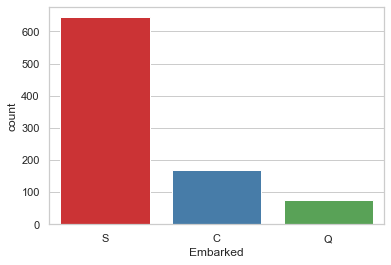

In [130]:
#Import the seaborn module
import seaborn as sns

print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(Train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=Train_df, palette='Set1')
sns.set_theme(style="whitegrid")
plt.show()

In [131]:
#Calculate the most common port of embarkation is the dataset
print('The most common port of embarkation is:')
statistics.mode(Test_df['Embarked'].dropna().to_list())

The most common port of embarkation is:


'S'

**Final Adjustments to data (Train & Test)**

Based on my assessment of the missing values in the dataset, I will make the following changes to the data:

1. Where 'Age' is missing for a given row, I will impute with 28 (median age for train data) and 27 (median age for test data)

2. Where 'Embarked' is missing for a given row, I will impute 'S' (the mode/most common boarding port)

2. I chose to ignore 'Cabin' as a variable because there are too many missing values for imputation. Moreover, based on the information provided by the dataset, it seems like cabin is associated with the zone the passenger was allocated on board. Imputing it will bias the results of the machine learning models and/or reduce the accuracy of the model. Hence i have decided to exclude/drop the column

In [132]:
Train_data = Train_df.copy()
Train_data["Age"].fillna(Train_df["Age"].median(skipna=True), inplace=True)
Train_data["Embarked"].fillna(Train_df['Embarked'].value_counts().idxmax(), inplace=True)
Train_data.drop('Cabin', axis=1, inplace=True)
Train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [133]:
Test_data = Test_df.copy()
Test_data["Age"].fillna(Test_df["Age"].median(skipna=True), inplace=True)
Test_data["Embarked"].fillna(Test_df['Embarked'].value_counts().idxmax(), inplace=True)
Test_data.drop('Cabin', axis=1, inplace=True)
Test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [134]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [135]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


**Visualizing the number of people who survived grouped by gender**

Boarded passengers grouped by gender in Traning Data:
male      577
female    314
Name: Sex, dtype: int64


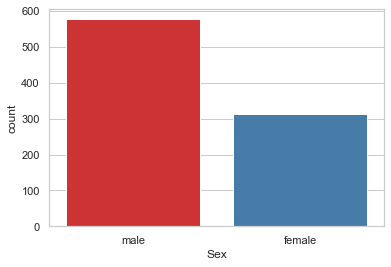

Boarded passengers grouped by gender in Testing Data:
male      266
female    152
Name: Sex, dtype: int64


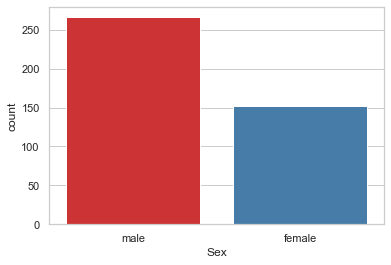

In [136]:
print('Boarded passengers grouped by gender in Traning Data:')
print(Train_data['Sex'].value_counts())
sns.countplot(x='Sex', data=Train_data, palette='Set1')
sns.set_theme(style="whitegrid")
plt.show()

print('Boarded passengers grouped by gender in Testing Data:')
print(Test_data['Sex'].value_counts())
sns.countplot(x='Sex', data=Test_data, palette='Set1')
sns.set_theme(style="whitegrid")
plt.show()

Based on the data given, it seems like there were more men than women on board the Titanic.

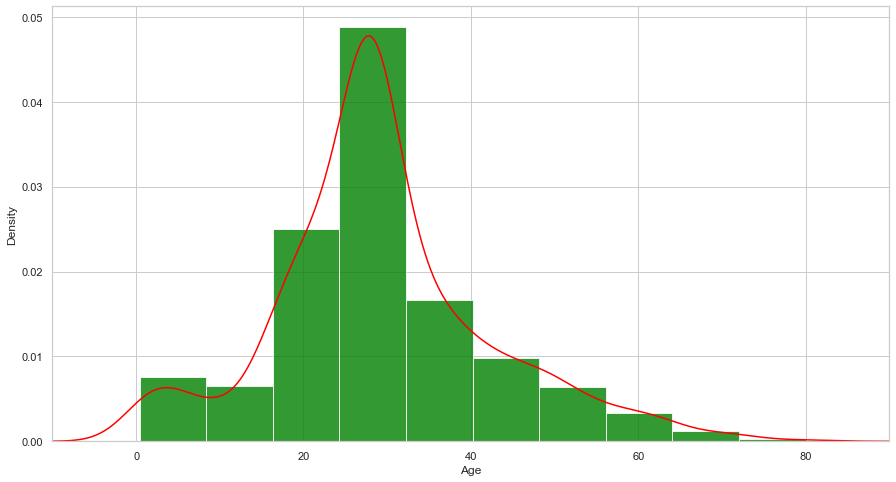

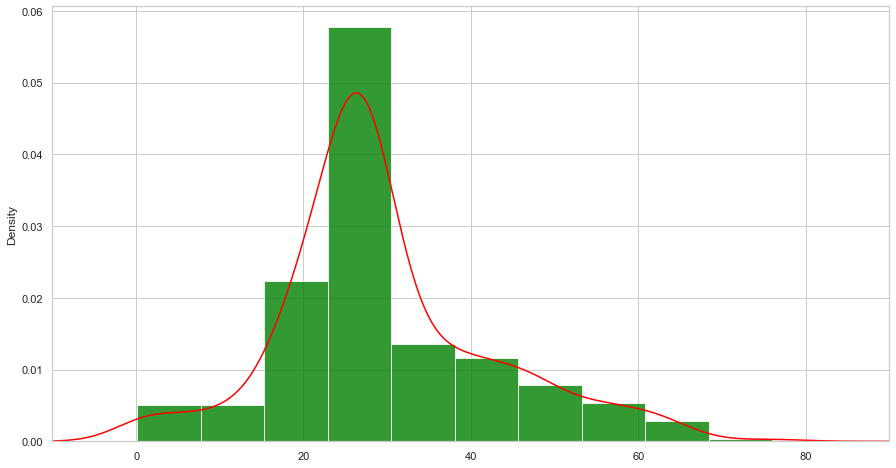

In [137]:
plt.figure(figsize=(15,8))
ax = Train_data["Age"].hist(bins=10, density=True, stacked=True, color='green', alpha=0.8)
Train_data["Age"].plot(kind='density',color='red')
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

plt.figure(figsize=(15,8))
ax1 = Test_data["Age"].hist(bins=10, density=True, stacked=True, color='green', alpha=0.8)
Test_data["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

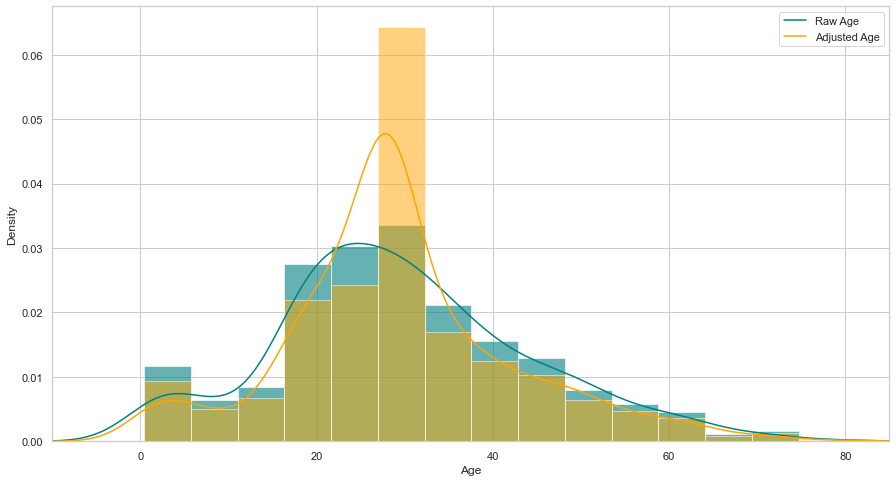

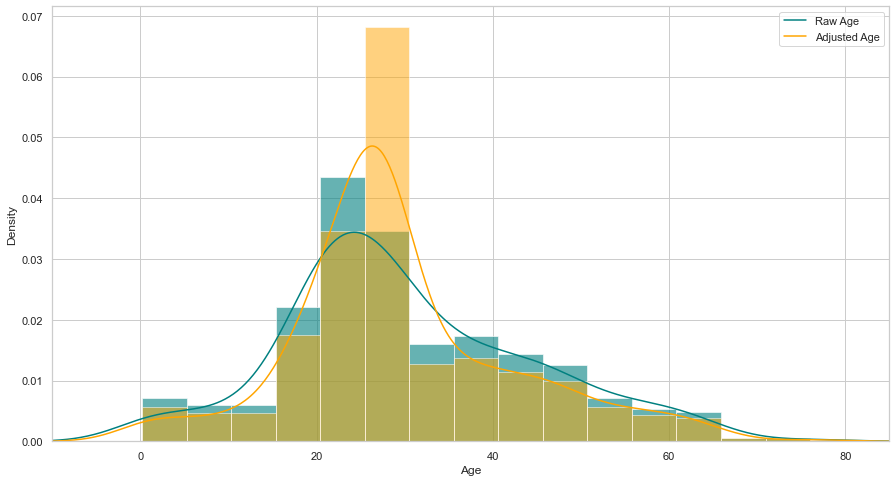

In [138]:
plt.figure(figsize=(15,8))
ax = Train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Train_df["Age"].plot(kind='density', color='teal')
ax = Train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
Train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

plt.figure(figsize=(15,8))
ax = Test_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Test_df["Age"].plot(kind='density', color='teal')
ax = Test_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
Test_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

**Additional Variables**

According to Kaggle data dictionary, SibSp relates to the number of Siblings/Spouse Aboard and Parch relates to the number of Parents/children aboard. Therefore in order to account for possible multicollinearity (defined as the occurrence of high intercorrelations among two or more independent variables in a multiple regression model). I will also combine the effect of these variables into one categorical predictor: whether or not that individual was traveling with someone or alone.

In [139]:
#create additional categorical variable for traveling alone
Train_data['Travel Alone']=np.where((Train_data['SibSp']+ Train_data['Parch'])>0,0,1)
Train_data.drop('SibSp', axis = 1, inplace = True)
Train_data.drop('Parch', axis = 1, inplace = True)

I will also create categorical variables for Passenger Class ('Pclass), Gender ('Sex'), and Port Embarked ('Embarked')

In [140]:
#create categorical variables and drop some variables
Training = pd.get_dummies(Train_data, columns=['Pclass', 'Embarked', 'Sex'])
Training.drop('Sex_female', axis = 1, inplace = True)
Training.drop('PassengerId', axis = 1, inplace = True)
Training.drop('Name', axis= 1, inplace = True)
Training.drop('Ticket', axis = 1, inplace = True)

final_train = Training
final_train.head()

,Survived,Age,Fare,Travel Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [141]:
final_train.isnull().sum()

Survived        0
Age             0
Fare            0
Travel Alone    0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_male        0
dtype: int64

I will also apply the same changes to the testing data. I will apply the same imputation for 'Age' in the Test data as I did for my Training Data (if missing, Age = 28).

I will exclude the Cabin variable from the Test data as I have decided to exclude it from my analysis. 

There are no missing values in the 'Embarked' port variable. 

I will add the dummy variable to finalize the test dataset. 

I will finally impute the missing 'Fare' value with median 14.45

In [142]:
Test_data = Test_df.copy()
Test_data["Age"].fillna(Train_df["Age"].median(skipna=True), inplace=True)
Test_data["Fare"].fillna(Train_df["Fare"].median(skipna=True), inplace=True)
Test_data.drop('Cabin', axis=1, inplace=True)

Test_data['TravelAlone']=np.where((Test_data["SibSp"]+Test_data["Parch"])>0, 0, 1)

Test_data.drop('SibSp', axis=1, inplace=True)
Test_data.drop('Parch', axis=1, inplace=True)

Testing = pd.get_dummies(Test_data, columns=["TravelAlone","Pclass","Embarked","Sex"])
Testing.drop('Sex_female', axis=1, inplace=True)
Testing.drop('PassengerId', axis=1, inplace=True)
Testing.drop('Name', axis=1, inplace=True)
Testing.drop('Ticket', axis=1, inplace=True)

final_test = Testing
final_test.head()

,Age,Fare,TravelAlone_0,TravelAlone_1,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,0,1,0,0,1,0,1,0,1
1,47.0,7.0000,1,0,0,0,1,0,0,1,0
2,62.0,9.6875,0,1,0,1,0,0,1,0,1
3,27.0,8.6625,0,1,0,0,1,0,0,1,1
4,22.0,12.2875,1,0,0,0,1,0,0,1,0


<h2>Exploratory Data Analysis<h2>

<h5>Exploratory by Age<h5>

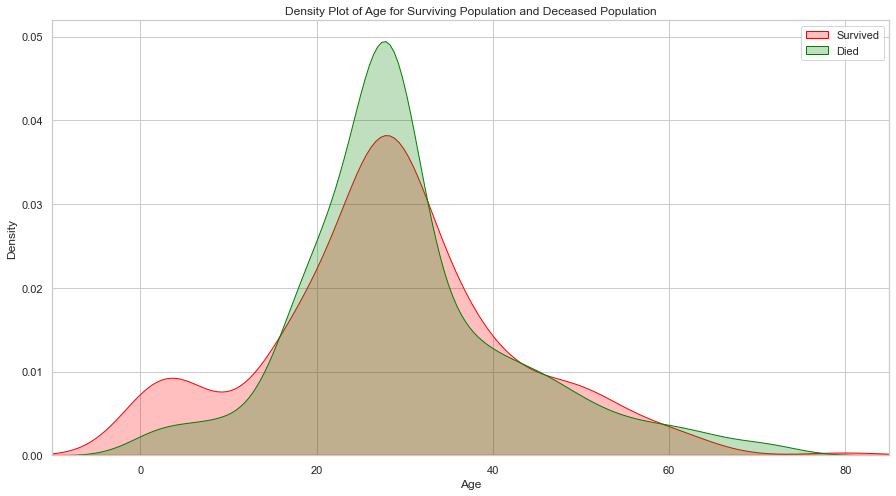

In [143]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="red", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="green", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


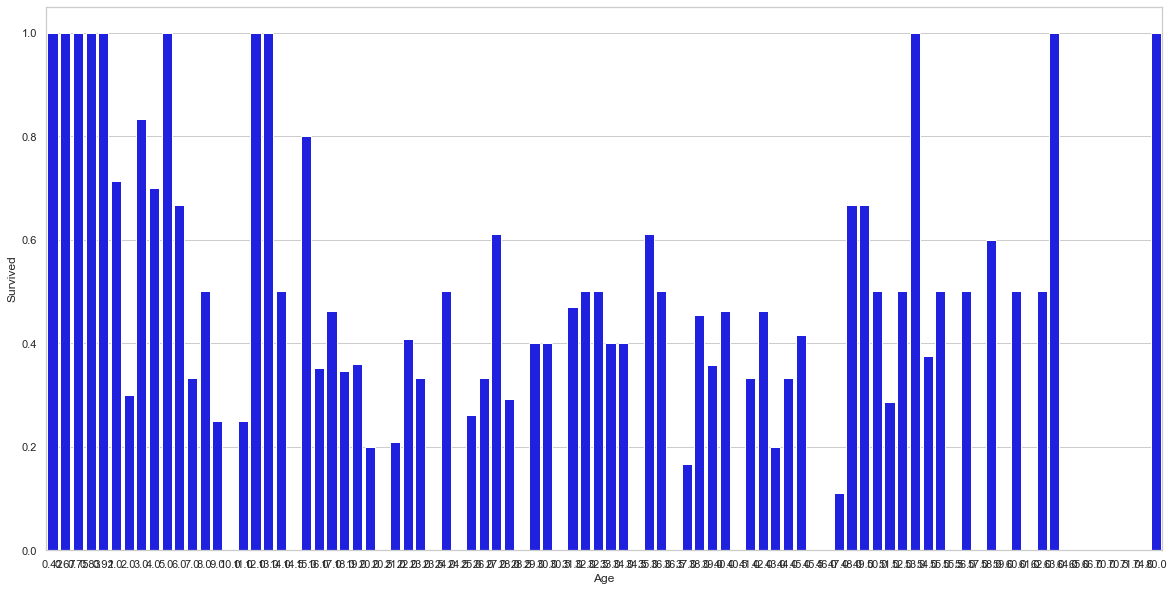

In [144]:
plt.figure(figsize=(20,10))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="blue")
plt.show()

From the data, you can see that there is not much difference in the distribution of those that died and those that survived. However, one notable difference is that, the majority of those that survived where children and the elderly.

considering the survival rate of children under 16, I will include a new variable in my dataset called: 'Minor'

In [145]:
final_train['Is Minor']=np.where(final_train['Age']<=16, 1, 0)

final_test['Is Minor'] = np.where(final_test['Age']<=16, 1, 0)



<h5>Exploring of fare<h5>

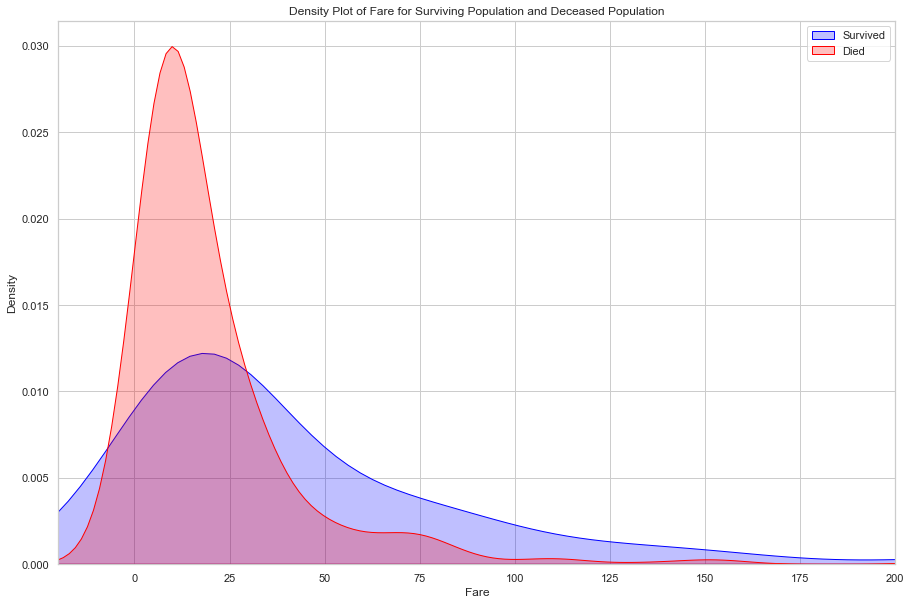

In [146]:
plt.figure(figsize=(15,10))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="blue", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

From this graph, there is a clear difference between the fare price of survivors and the fare price of those deceased. This will likely be an important predictor of survival. It seems like those passengers who paid low fares had lower chances of survival which may be associated with the Pclass they may have been allocated. Those that paid higher fares had better chances of survival also which maybe based on the class they were allocated.

<h5>Exploration of passenger class<h5>

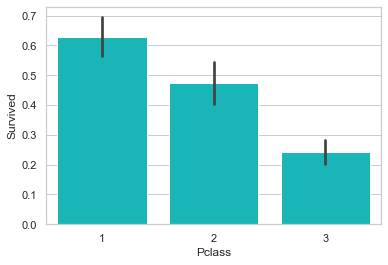

In [147]:
sns.barplot(x= 'Pclass',y='Survived', data=Train_data, color="darkturquoise")
plt.show()

The graph shows that the majority of survivors were in first class and second class. The people who had the least chances of survival were in third class. This correlates with the amount of fare there passenger paid.

<h5>Exploration of embarked port<h5>

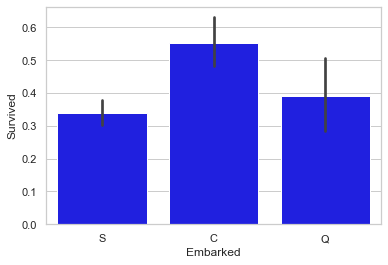

In [148]:
sns.barplot(x='Embarked', y='Survived', data=Train_data, color="blue")
plt.show()

Those who boarded the ship from Cherbourg where the majority of survivors while those who boarded from Southampton had marginally lesser chances of survival. 

<h5>Exploration of traveling alone and with family<h5>

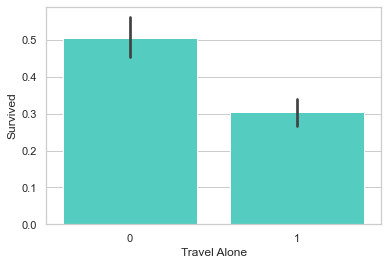

In [149]:
sns.barplot(x='Travel Alone', y='Survived', data=Train_data, color="turquoise")
plt.show()

people who traveled alone were more likely to die in the disaster compared to those who traveled with family

<h5>Exploration of Gender variables<h5>

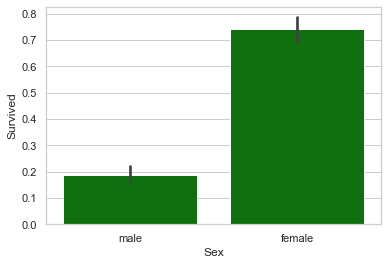

In [150]:
sns.barplot(x='Sex', y = 'Survived', data = Train_data, color = 'green')
plt.show()

Females were more likely to survive than males. 

<h4>LOGISTIC REGRESSION<h4>

<h5>Feature Selection<h5>

In this section, I will choose the best method for reducing the number of input variables to develope my predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

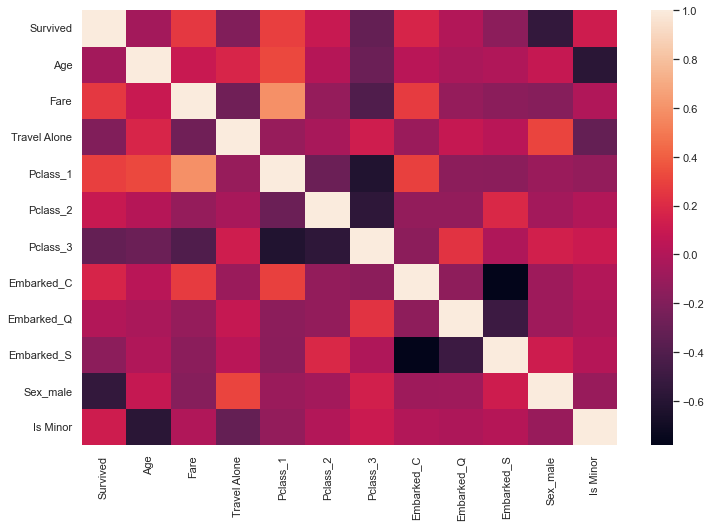

In [151]:

fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(final_train.corr(), ax=ax)
plt.show()

In [152]:
abs(final_train.corr()['Survived'])

Survived        1.000000
Age             0.064910
Fare            0.257307
Travel Alone    0.203367
Pclass_1        0.285904
Pclass_2        0.093349
Pclass_3        0.322308
Embarked_C      0.168240
Embarked_Q      0.003650
Embarked_S      0.149683
Sex_male        0.543351
Is Minor        0.121485
Name: Survived, dtype: float64

<h3>Logistic Regression<h3>

<h5>Recursive Feature Elimination<h5>

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.



In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [154]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Age           891 non-null    float64
 2   Fare          891 non-null    float64
 3   Travel Alone  891 non-null    int64  
 4   Pclass_1      891 non-null    uint8  
 5   Pclass_2      891 non-null    uint8  
 6   Pclass_3      891 non-null    uint8  
 7   Embarked_C    891 non-null    uint8  
 8   Embarked_Q    891 non-null    uint8  
 9   Embarked_S    891 non-null    uint8  
 10  Sex_male      891 non-null    uint8  
 11  Is Minor      891 non-null    int64  
dtypes: float64(2), int64(3), uint8(7)
memory usage: 41.0 KB


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","Travel Alone","Pclass_1","Pclass_2", "Pclass_3","Embarked_C","Embarked_S","Sex_male","Is Minor"] 
X = final_train[cols]
y = final_train['Survived']

# Build a logistic regression model and compute the important features 
model = LogisticRegression(solver= 'lbfgs', class_weight = 'balanced', max_iter = 10000)

# create the RFE model and select 9 attributes
rfe = RFE(model, n_features_to_select =9, step =1)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Travel Alone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Sex_male', 'Is Minor']


<h5>Recursive feature selection and cross validation<h5>

Optimal number of features: 6
Selected features: ['Pclass_1', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Sex_male', 'Is Minor']


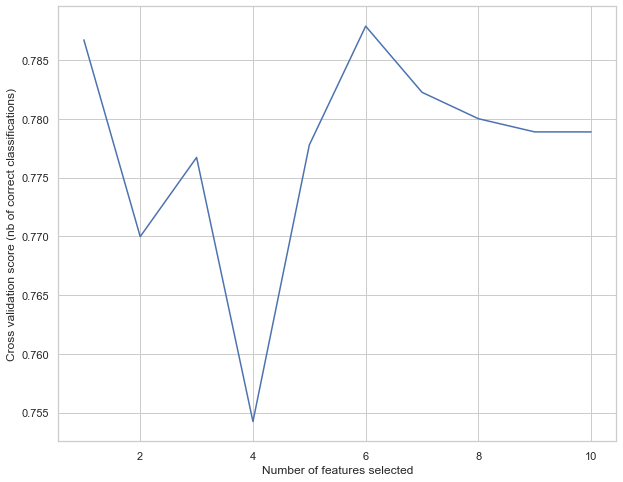

In [156]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(solver= 'lbfgs', class_weight = 'balanced', max_iter = 10000), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

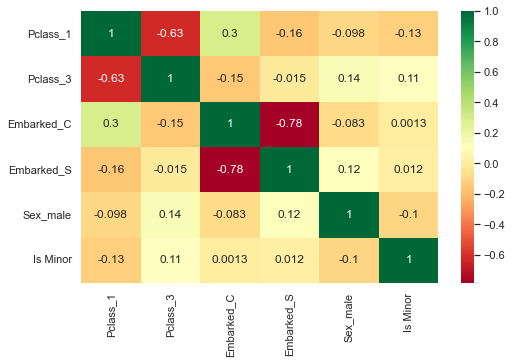

In [157]:
Selected_features = ['Pclass_1', 'Pclass_3', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'Is Minor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.765
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.842


/var/folders/lb/hct3pxn95vg452dh9_01nklr0000gn/T/ipykernel_20892/1335123657.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
/var/folders/lb/hct3pxn95vg452dh9_01nklr0000gn/T/ipykernel_20892/1335123657.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


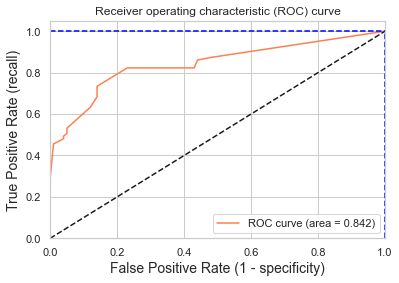

Using a threshold of 0.065 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [158]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))